# Import Library and Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Project Data Science/Analyzing Product Sales - Kalbe Nutritionals')

#import dataset
pd.set_option('display.max_columns', None)
df_transaction = pd.read_csv('Case Study - Transaction.csv', sep=';')
df_store = pd.read_csv('Case Study - Store.csv', sep=';')
df_customer = pd.read_csv('Case Study - Customer.csv', sep=';')
df_product = pd.read_csv('Case Study - Product.csv', sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cek Data

In [ ]:
df_transaction.head(3)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4


In [ ]:
df_store.head(3)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
2,3,Prima Kota,Prima,Modern Trade,-7.797068,110.370529


In [ ]:
df_customer.head(3)

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,5.12
1,2,60,1,Married,6.23
2,3,32,1,Married,9.17


In [ ]:
df_product.head(3)

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500


In [ ]:
# Change data type feature 'Gender'
df_customer['Gender'].replace({0:'Wanita', 1:'Pria'}, inplace=True)

# Change data type feature 'Date'
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

# Join table
df_merge = pd.merge(df_transaction, df_customer, on='CustomerID')
df_merge = pd.merge(df_merge, df_product, on='ProductID')
df_merge = pd.merge(df_merge, df_store, on='StoreID')

print(f'Total Data :', df_merge.shape[0])

Total Data : 5020


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price_x         5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   object        
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  Price_y         5020 non-null   int64         
 14  StoreName       5020 non-null   object        
 15  Grou

In [ ]:
# Drop duplicated feature
df_merge = df_merge.drop(columns='Price_y', axis=1)
df_merge = df_merge.rename(columns={'Price_x':'Price'})

# Descriptive analytics for data type numericals
df_nums = df_merge.select_dtypes(exclude=['object', 'datetime64'])
df_nums.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5020.0,221.263745,129.672955,1.000000,108.000000,221.000000,332.000000,447.000000
Price,5020.0,9684.800797,4600.708780,3200.000000,4200.000000,9400.000000,15000.000000,18000.000000
Qty,5020.0,3.644622,1.855295,1.000000,2.000000,3.000000,5.000000,10.000000
TotalAmount,5020.0,32279.482072,19675.462455,7500.000000,16000.000000,28200.000000,47000.000000,88000.000000
StoreID,5020.0,7.489841,4.028502,1.000000,4.000000,7.000000,11.000000,14.000000
Age,5020.0,40.003586,12.834719,0.000000,30.000000,39.000000,51.000000,72.000000
Income,5020.0,8.623713,6.518242,0.000000,4.220000,7.720000,10.780000,71.300000
Latitude,5020.0,-2.942236,4.323225,-7.797068,-6.914864,-5.135399,0.533505,5.548290
Longitude,5020.0,109.600789,8.357593,95.323753,104.756554,110.370529,114.590111,128.190643


In [ ]:
# Descriptive analytics for data type categories
df_cats = df_merge.select_dtypes(include='object')
desc_cats = df_cats.describe().T.reset_index()
desc_cats['persent mode to all data(%)'] = (desc_cats['freq'] / desc_cats['count'])*100
desc_cats['persent mode to all data(%)'] = desc_cats['persent mode to all data(%)'].apply(lambda x : round(x,2))
desc_cats

,index,count,unique,top,freq,persent mode to all data(%)
0,TransactionID,5020,4908,TR71313,3,0.06
1,ProductID,5020,10,P5,814,16.22
2,Gender,5020,2,Wanita,2746,54.70
3,Marital Status,4976,2,Married,3779,75.94
4,Product Name,5020,10,Thai Tea,814,16.22
5,StoreName,5020,12,Lingga,738,14.70
6,GroupStore,5020,7,Prima,1085,21.61
7,Type,5020,2,General Trade,2851,56.79


In [ ]:
# Check missing value
df_mv = df_merge.isna().sum().reset_index().rename(columns={0:'total_missing_values'})
df_mv ['percentage(%)'] = ((df_mv['total_missing_values']/df_merge.shape[0])*100).apply(lambda x: round(x,2))
df_mv = df_mv.sort_values('total_missing_values', ascending=False)
df_mv

,index,total_missing_values,percentage(%)
10,Marital Status,44,0.88
0,TransactionID,0,0.00
1,CustomerID,0,0.00
16,Latitude,0,0.00
15,Type,0,0.00
14,GroupStore,0,0.00
13,StoreName,0,0.00
12,Product Name,0,0.00
11,Income,0,0.00
9,Gender,0,0.00


In [ ]:
# Fill missing value
df_merge['Marital Status'].fillna('Single', inplace=True) #assumption : customer single doesn't want to fill it

# Check persentation data
ms_vc = df_merge['Marital Status'].value_counts().reset_index()
ms_vc['percentage(%)'] = ((ms_vc['Marital Status'] / ms_vc['Marital Status'].sum())*100).apply(lambda x: round(x,2))
ms_vc

,index,Marital Status,percentage(%)
0,Married,3779,75.28
1,Single,1241,24.72


In [ ]:
# Check duplicate data
if df_merge.duplicated().any():
    print(f"There are {df_merge.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


# Exploratory Data Analysis

In [ ]:
# Check total customer
print(f'Total Customer :', len(df_merge['CustomerID'].unique()))

# Check total transaction
print(f'Total Transaction :', len(df_merge))

Total Customer : 447
Total Transaction : 5020


### The Average Age of Customer Based On Their Marital Status

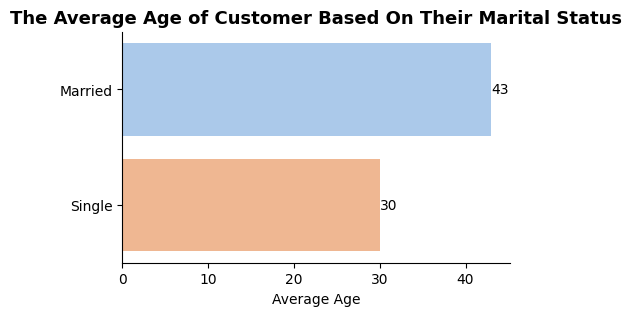

In [ ]:
# Table Aggregate
msa = df_merge.copy()
msa = msa.groupby('Marital Status').agg({'Age':'mean'}).reset_index()
msa['Age'] = msa['Age'].apply(lambda x: round(x,0))

# Plotting
plt.figure(figsize=(5, 3))
ax = sns.barplot(data=msa, x='Age', y='Marital Status', palette='pastel')
sns.despine()
plt.title('The Average Age of Customer Based On Their Marital Status', weight='bold', fontsize=13)
plt.xlabel('Average Age', fontsize=10)
plt.ylabel('', fontsize=10)

# Adding labels to the bars
for index, value in enumerate(msa['Age']):
    ax.text(value, index, str(int(value)), ha='left', va='center', fontsize=10)

plt.show()

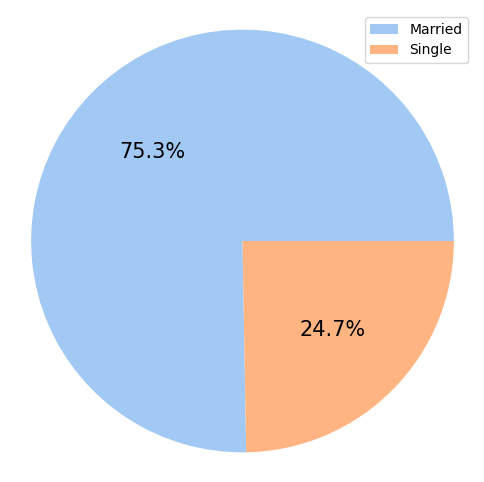

In [ ]:
# Plot percentage customer
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(df_merge['Marital Status'].value_counts(), labels=None, autopct='%1.1f%%', colors=sns.color_palette('pastel'), textprops={'fontsize': 15})
plt.legend(labels=df_merge['Marital Status'].unique(), loc='best')  # Set the unique labels as the legend
#plt.title('Percentage of Customers by Marital Status', weight='bold', fontsize=13)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### The Average Age of Customer Based On Their Gender

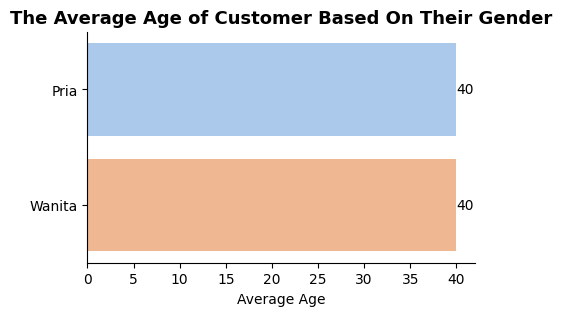

In [ ]:
ga = df_merge.groupby('Gender').agg({'Age':'mean'}).reset_index()
ga['Age'] = ga['Age'].apply(lambda x: round(x,0))

# Plotting
plt.figure(figsize=(5, 3))
ax = sns.barplot(data=ga, x='Age', y='Gender', palette='pastel')
sns.despine()
plt.title('The Average Age of Customer Based On Their Gender', weight='bold', fontsize=13)
plt.xlabel('Average Age', fontsize=10)
plt.ylabel('', fontsize=10)

# Adding labels to the bars
for index, value in enumerate(ga['Age']):
    ax.text(value, index, str(int(value)), ha='left', va='center', fontsize=10)

plt.show()

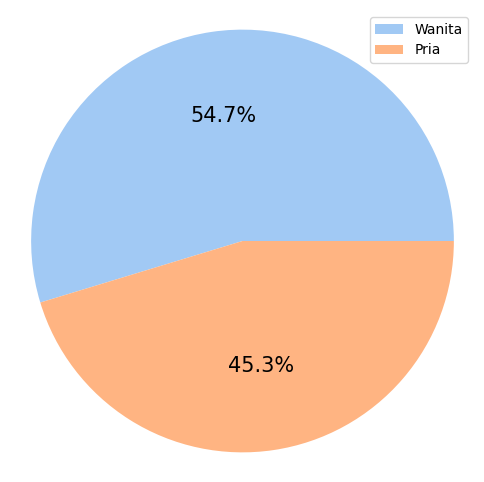

In [ ]:
# Plot percentage customer
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(df_merge['Gender'].value_counts(), labels=None, autopct='%1.1f%%', colors=sns.color_palette('pastel'), textprops={'fontsize': 15})
plt.legend(labels=df_merge['Gender'].unique(), loc='best')  # Set the unique labels as the legend
#plt.title('Percentage of Customers by Marital Status', weight='bold', fontsize=13)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()  # Equal aspect ratio ensures the pie chart is circular
plt.show()

### The Order of Store Names with The Highest Total Quantity

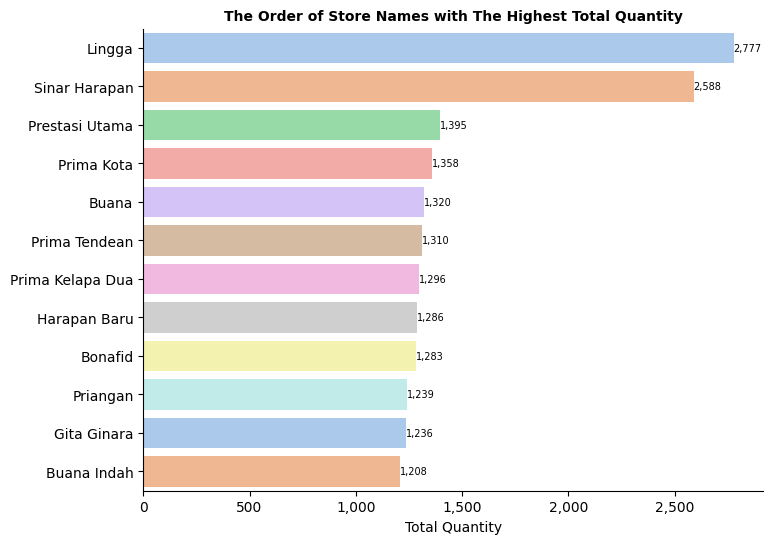

In [ ]:
# Table Aggregate
osn = df_merge.groupby('StoreName').agg({'Qty':'sum'}).reset_index()
osn = osn.sort_values('Qty', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=osn, x='Qty', y='StoreName', palette='pastel')
sns.despine()
plt.title('The Order of Store Names with The Highest Total Quantity', weight='bold', fontsize=10)
plt.xlabel('Total Quantity', fontsize=10)
plt.ylabel('', fontsize=10)

# Adding labels to the bars with comma as thousand separator
for index, value in enumerate(osn['Qty']):
    label_text = '{:,.0f}'.format(value)  # Format the label text with comma as thousand separators
    ax.text(value, index, label_text, ha='left', va='center', fontsize=7)

# Adjusting the x-axis scale and labels
x_ticks_labels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]  # Format the x-axis labels with comma as thousand separators
ax.set_xticklabels(x_ticks_labels)

plt.show()

### Best Sold Product

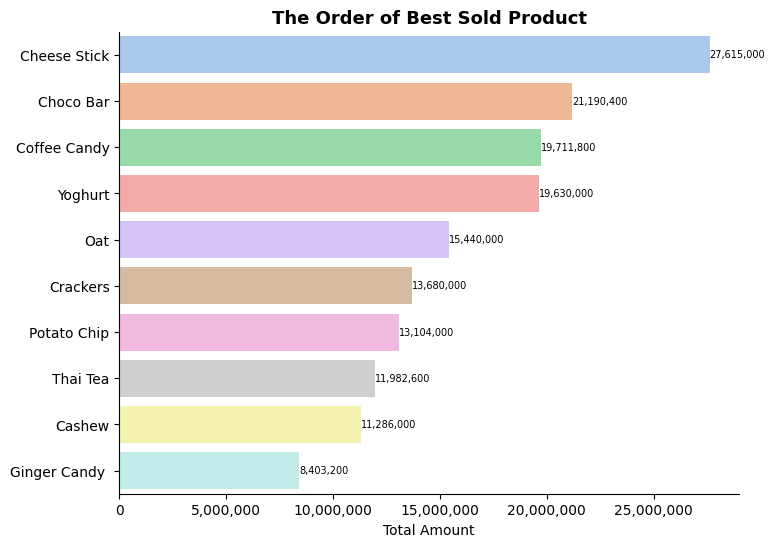

In [ ]:
# Table Aggregate
bp = df_merge.groupby('Product Name').agg({'TotalAmount':'sum'}).reset_index()
bp = bp.sort_values('TotalAmount', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=bp, x='TotalAmount', y='Product Name', palette='pastel')
sns.despine()
plt.title('The Order of Best Sold Product', weight='bold', fontsize=13)
plt.xlabel('Total Amount', fontsize=10)
plt.ylabel('', fontsize=10)

# Adding labels to the bars with comma as thousand separator
for index, value in enumerate(bp['TotalAmount']):
    label_text = '{:,.0f}'.format(value)  # Format the label text with comma as thousand separators
    ax.text(value, index, label_text, ha='left', va='center', fontsize=7)

# Adjusting the x-axis scale and labels
x_ticks_labels = ['{:,.0f}'.format(x) for x in ax.get_xticks()]  # Format the x-axis labels with comma as thousand separators
ax.set_xticklabels(x_ticks_labels)

plt.show()